In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../../Datasets/HousePricePrediction/train.csv',keep_default_na=False)


In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [4]:
df_train.isna().sum()[df_train.isna().sum()>0] #for keep_default_na=True

Series([], dtype: int64)

In [5]:
df_train.isna().sum()[df_train.isna().sum()>0] #for keep_default_na=False

Series([], dtype: int64)

In [6]:
df_train['MasVnrArea'].value_counts()

0      861
NA       8
72       8
108      8
180      8
      ... 
562      1
89       1
921      1
762      1
119      1
Name: MasVnrArea, Length: 328, dtype: int64

In [7]:
V = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
L1 = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
    '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'n/a','nan', 'null']
L2 = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
    '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a','nan', 'null']
dict1 = {}
for i in df_train.columns:#.drop('SalePrice') :
    if i not in V:
        dict1[i] = L2
    else:
        dict1[i] = L1
dict1    

{'Id': ['',
  '#N/A',
  '#N/A N/A',
  '#NA',
  '-1.#IND',
  '-1.#QNAN',
  '-NaN',
  '-nan',
  '1.#IND',
  '1.#QNAN',
  '<NA>',
  'N/A',
  'NA',
  'NULL',
  'NaN',
  'n/a',
  'nan',
  'null'],
 'MSSubClass': ['',
  '#N/A',
  '#N/A N/A',
  '#NA',
  '-1.#IND',
  '-1.#QNAN',
  '-NaN',
  '-nan',
  '1.#IND',
  '1.#QNAN',
  '<NA>',
  'N/A',
  'NA',
  'NULL',
  'NaN',
  'n/a',
  'nan',
  'null'],
 'MSZoning': ['',
  '#N/A',
  '#N/A N/A',
  '#NA',
  '-1.#IND',
  '-1.#QNAN',
  '-NaN',
  '-nan',
  '1.#IND',
  '1.#QNAN',
  '<NA>',
  'N/A',
  'NA',
  'NULL',
  'NaN',
  'n/a',
  'nan',
  'null'],
 'LotFrontage': ['',
  '#N/A',
  '#N/A N/A',
  '#NA',
  '-1.#IND',
  '-1.#QNAN',
  '-NaN',
  '-nan',
  '1.#IND',
  '1.#QNAN',
  '<NA>',
  'N/A',
  'NA',
  'NULL',
  'NaN',
  'n/a',
  'nan',
  'null'],
 'LotArea': ['',
  '#N/A',
  '#N/A N/A',
  '#NA',
  '-1.#IND',
  '-1.#QNAN',
  '-NaN',
  '-nan',
  '1.#IND',
  '1.#QNAN',
  '<NA>',
  'N/A',
  'NA',
  'NULL',
  'NaN',
  'n/a',
  'nan',
  'null'],
 'Street': [

In [8]:

len(dict1)    

81

In [9]:
df_train = pd.read_csv('../../Datasets/HousePricePrediction/train.csv',keep_default_na=False,na_values=dict1)
df_test = pd.read_csv('../../Datasets/HousePricePrediction/test.csv',keep_default_na=False,na_values=dict1)
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal


In [10]:
df_train['Alley'].value_counts()

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [11]:
df_train.isna().sum()[df_train.isna().sum()>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

## Outlier Detection

In [77]:
Z_scores = (df_train['SalePrice']-df_train['SalePrice'].mean())/df_train['SalePrice'].std()

In [78]:
sum((Z_scores>-3) & (Z_scores<=3))/1460

0.9849315068493151

In [79]:
#df_train = df_train[((Z_scores>-2) & (Z_scores<=2))]

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

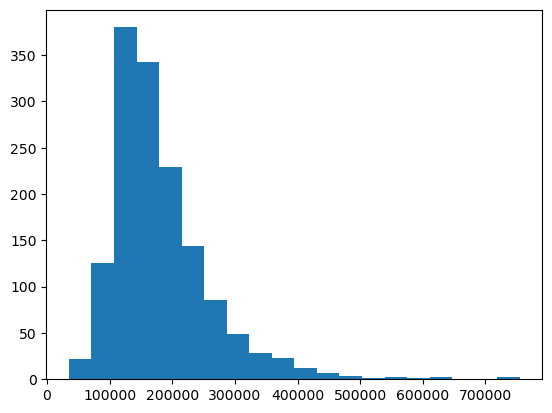

In [12]:
plt.hist(df_train['SalePrice'],bins=20)

In [13]:
df_train[df_train['SalePrice']<502965.]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [14]:
df_train = df_train[df_train['SalePrice']<502965.]

## Simple_Imputer

In [12]:
columns_cat = list(df_train.select_dtypes(include='object').columns)
columns_num = list(df_train.select_dtypes(exclude='object').columns)
columns_num.remove('Id')
columns_num.remove('SalePrice')

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

imputer_num.fit(df_train[columns_num])
imputer_cat.fit(df_train[columns_cat])

df_train[columns_num] = imputer_num.transform(df_train[columns_num])
df_train[columns_cat] = imputer_cat.transform(df_train[columns_cat])

df_test[columns_num] = imputer_num.transform(df_test[columns_num])
df_test[columns_cat] = imputer_cat.transform(df_test[columns_cat])

In [15]:
df_train.isna().sum()[df_train.isna().sum()>0], df_test.isna().sum()[df_test.isna().sum()>0]

(Series([], dtype: int64), Series([], dtype: int64))

## Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train[columns_num])
df_train[columns_num] = scaler.transform(df_train[columns_num])
df_test[columns_num] = scaler.transform(df_test[columns_num])

## One Hot Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_train[columns_cat])
df_train[ohe.get_feature_names()] = ohe.transform(df_train[columns_cat]).toarray()
df_test[ohe.get_feature_names()] = ohe.transform(df_test[columns_cat]).toarray()

In [19]:
ohe.transform(df_train[columns_cat]).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [20]:
len(list(ohe.get_feature_names()))

266

## Feature Selection - Correlation

In [60]:
col_list = columns_num + list(ohe.get_feature_names()) + ['SalePrice']

In [61]:
corr_values = df_train[col_list].corr()['SalePrice']
corr_values[(corr_values<-0.1)| (corr_values>0.1)].value_counts()

-0.236832    4
-0.152829    3
 0.351799    1
 0.101275    1
 0.307298    1
            ..
-0.112544    1
-0.164056    1
-0.179949    1
-0.143648    1
 1.000000    1
Name: SalePrice, Length: 141, dtype: int64

In [26]:
selected_cols = list((corr_values[(corr_values>0.1) | (corr_values<-0.1)]).index)
selected_cols.remove('SalePrice')
len(selected_cols)

148

In [27]:
df_train[selected_cols]

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,x37_N,x37_Y,x39_GdWo,x39_MnPrv,x39_NA,x41_New,x41_WD,x42_Abnorml,x42_Normal,x42_Partial
0,0.150685,0.033420,0.666667,0.949275,0.883333,0.122500,0.125089,0.064212,0.140098,0.119780,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.202055,0.038795,0.555556,0.753623,0.433333,0.000000,0.173281,0.121575,0.206547,0.212942,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.160959,0.046507,0.666667,0.934783,0.866667,0.101250,0.086109,0.185788,0.150573,0.134465,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.133562,0.038561,0.666667,0.311594,0.333333,0.000000,0.038271,0.231164,0.123732,0.143873,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.215753,0.060576,0.777778,0.927536,0.833333,0.218750,0.116052,0.209760,0.187398,0.186095,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.555556,0.920290,0.833333,0.000000,0.000000,0.407962,0.155974,0.142038,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1456,0.219178,0.055505,0.555556,0.768116,0.633333,0.074375,0.139972,0.252140,0.252373,0.399036,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1457,0.154110,0.036187,0.666667,0.500000,0.933333,0.000000,0.048724,0.375428,0.188543,0.195961,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1458,0.160959,0.039342,0.444444,0.565217,0.766667,0.000000,0.008682,0.000000,0.176432,0.170721,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Model Building

In [21]:
col = columns_num + list(ohe.get_feature_names()) 

In [22]:
X = df_train[col]
y = df_train['SalePrice']

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
model2 = GradientBoostingRegressor(n_estimators = 97)

In [41]:
model2.fit(X,y)

GradientBoostingRegressor(n_estimators=97)

In [42]:
model2.score(X,y)

0.9661340814630888

In [43]:
yp2 = model2.predict(df_test[col])

In [46]:
df_test['SalePrice'] = yp2

In [47]:
df_test[['Id','SalePrice']].to_csv('hpp_gd_new.csv',index=False)

## RandomForest

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [278]:
params = {'n_estimators':[10,20,30,40,50],'max_depth':[2,3,4,5],'min_samples_leaf':[2,3,4,5]}
gridcv = GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5,scoring='accuracy',verbose=0)
gridcv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [279]:
gridcv.best_estimator_

RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=10)

In [280]:
model = RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=10)

In [281]:
model.fit(X,y)

RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=10)

In [282]:
model.score(X,y)

0.5650809943141831

In [262]:
yp = model.predict(df_test[selected_cols])

In [263]:
df_test['SalePrice'] = yp

In [ ]:
df_test[['Id','SalePrice']].to_csv('hpp1.csv',index=False)

## SVM

In [36]:
from sklearn.svm import SVR

In [37]:
model_l = SVR(kernel='poly')

In [38]:
model_l.fit(X,y)
model_l.score(X,y)

-0.0422300960123696

## Feature Reduction

In [21]:
col = columns_num + list(ohe.get_feature_names()) 

In [22]:
X1 = df_train[col] 
X2 = df_test[col]

In [23]:
X2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_Abnorml,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
0,0.000000,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.00000,0.082920,0.097693,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.06750,0.163536,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.00000,0.140149,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.195205,0.040562,0.555556,0.625,0.913043,0.800000,0.01250,0.106662,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,0.075342,0.017318,0.777778,0.500,0.869565,0.700000,0.00000,0.046598,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.000000,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.823529,0.000000,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,0.000000,0.476027,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.382353,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
X1.shape,X2.shape

((1460, 302), (1459, 302))

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=10)

In [27]:
X_train = pca.fit_transform(X1)
X_test = pca.fit_transform(X2)

In [28]:
X_train.shape,X_test.shape

((1460, 10), (1459, 10))

In [29]:
pca.explained_variance_

array([2.46953851, 1.00449895, 0.60269838, 0.52819369, 0.48382493,
       0.45750922, 0.3917613 , 0.375048  , 0.35370431, 0.3179435 ])

In [30]:
y_train = df_train['SalePrice']

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
model3 = GradientBoostingRegressor()

In [33]:
model3.fit(X_train,y_train)

GradientBoostingRegressor()

In [34]:
model3.score(X_train,y_train)

0.8658169701232942

In [249]:
yp_test = model3.predict(X_test)

In [250]:
df_test['SalePrice'] = yp_test

In [251]:
df_test[['Id','SalePrice']].to_csv('pca1.csv',index=False)